In [1]:
import pylab
import matplotlib
import numpy as np
import pandas as pd
from skimage.util import img_as_float
from skimage.io import imread

Загрузите картинку parrots.jpg. Преобразуйте изображение, приведя все значения в интервал от 0 до 1. Для этого можно воспользоваться функцией img_as_float из модуля skimage. Обратите внимание на этот шаг, так как при работе с исходным изображением вы получите некорректный результат.

In [2]:
image = img_as_float(imread('parrots.jpg'))
w, h, d = image.shape

In [3]:
for mass in image:
    for arr in mass:
        for num in arr:
            if num > 1:
                print 'IT\'S a TRAP!'

Создайте матрицу объекты-признаки: характеризуйте каждый пиксель тремя координатами - значениями интенсивности в пространстве RGB.

In [4]:
pixels = pd.DataFrame(np.reshape(image, (w*h, d)), columns=['R', 'G', 'B'])
pixels.head()

,R,G,B
0,0.015686,0.494118,0.019608
1,0.007843,0.494118,0.007843
2,0.007843,0.494118,0.007843
3,0.007843,0.494118,0.007843
4,0.007843,0.501961,0.011765


Запустите алгоритм K-Means с параметрами init='k-means++' и random_state=241. После выделения кластеров все пиксели, отнесенные в один кластер, попробуйте заполнить двумя способами: медианным и средним цветом по кластеру.

In [5]:
from sklearn.cluster import KMeans

In [26]:
kmean = KMeans(init='k-means++', random_state=241).fit(pixels)
pixels['Label']= kmean.labels_

medians, means = pixels.groupby('Label').median().values, pixels.groupby('Label').mean().values

medians_pixels, means_pixels = [medians[c] for c in pixels['Label'].values], [means[c] for c in pixels['Label'].values]

medians_img, means_img = np.reshape(medians_pixels, (w,h,d)), np.reshape(means_pixels, (w,h,d))

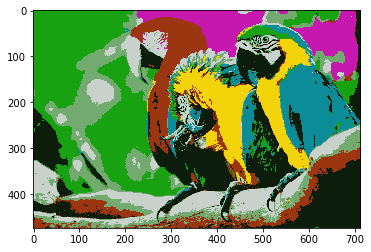

In [29]:
%matplotlib inline
pylab.imshow(medians_img)

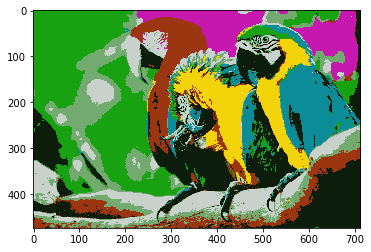

In [30]:
pylab.imshow(means_img)

In [40]:
def psnr(img1,img2):
    mse = np.mean((img1-img2)**2)
    return 10 * np.log10(1/mse)

In [39]:
psnr(means_img, medians_img)

29.909743851291989

Найдите минимальное количество кластеров, при котором значение PSNR выше 20 (можно рассмотреть не более 20 кластеров, но не забудьте рассмотреть оба способа заполнения пикселей одного кластера). Это число и будет ответом в данной задаче.
